In [2]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

import npc_lims
from npc_sessions import DynamicRoutingSession
from dynamic_routing_analysis import data_utils, spike_utils

# plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams.update({'font.size': 8,'pdf.fonttype':42})

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [14]:
ephys_sessions = tuple(s for s in npc_lims.get_session_info(is_ephys=True, is_uploaded=True, is_annotated=True, issues = []))

In [19]:
# #save as pickle file

# save ids of ephys sessions
ephys_ids = [s.id for s in ephys_sessions]
with open(r'D:\\dr_ephys_sessions_list_2024_10_30_0.pkl', 'wb') as f:
    pickle.dump(list(ephys_ids), f)

In [4]:
# # find a session somehow
# session_info = npc_lims.get_session_info(None)
# session_info
# units[:]['structure'].unique()
# len(ephys_ids)
# ephys_ids



In [3]:
# load a session
session_id='668755_2023-08-30'

session = DynamicRoutingSession(session_id)
session_info=npc_lims.get_session_info(session.id)
trials=data_utils.load_trials_or_units(session,'trials')
units=data_utils.load_trials_or_units(session,'units')

# print areas recorded
units['structure'].unique()


668755_2023-08-30 cached trials loaded
668755_2023-08-30 cached units loaded


array(['ACAd', 'ACAv', 'AId', 'CP', 'CTXsp', 'EPd', 'FRP', 'GU', 'HPF',
       'LGv', 'MB', 'MOp', 'MOs', 'MPT', 'NOT', 'NPC', 'OLF', 'ORBl',
       'ORBvl', 'PIR', 'PPT', 'RSPagl', 'RSPd', 'RSPv', 'SCop', 'SCsg',
       'SCzo', 'SSp', 'TTd', 'VISam', 'VL', 'out of brain'], dtype=object)

In [4]:
trials

,start_time,stop_time,quiescent_start_time,quiescent_stop_time,stim_start_time,stim_stop_time,response_window_start_time,response_window_stop_time,task_control_response_time,response_time,...,is_vis_nontarget,is_vis_context,is_aud_context,is_context_switch,is_repeat,is_opto,session_idx,date,subject_id,session_id
id,,,,,,,,,,,,,,,,,,,,,
0,1947.14006,1952.66137,1947.14006,1948.64162,1948.649696,1949.149696,1948.72472,1949.64210,1948.87482,1948.86788,...,False,False,True,False,False,False,0,2023-08-30,668755,668755_2023-08-30_0
1,1953.07833,1958.58302,1953.07833,1954.57960,1954.587676,1955.087676,1954.66302,1955.58049,1954.81314,1954.80429,...,False,False,True,False,False,False,0,2023-08-30,668755,668755_2023-08-30_0
2,1963.52039,1969.02506,1963.52039,1965.02166,1965.028836,1965.528836,1965.10505,1966.02254,1965.23854,1965.23163,...,False,False,True,False,False,False,0,2023-08-30,668755,668755_2023-08-30_0
3,1971.02674,1976.53136,1971.02674,1972.52800,1972.535609,1973.035609,1972.61139,1973.52884,1972.89498,1972.88404,...,False,False,True,False,False,False,0,2023-08-30,668755,668755_2023-08-30_0
4,1976.64810,1982.15272,1976.64810,1978.14935,1978.156993,1978.656993,1978.23278,1979.15018,1978.38300,1978.37424,...,False,False,True,False,False,False,0,2023-08-30,668755,668755_2023-08-30_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,5556.39915,5561.95381,5556.39915,5557.91705,5557.924393,5558.424393,5558.00046,5558.93458,5558.20068,5558.18867,...,False,True,False,False,False,False,0,2023-08-30,668755,668755_2023-08-30_0
509,5567.79199,5573.34668,5567.79199,5569.31000,5569.340615,5569.841025,5569.39341,5570.31080,5569.66025,5569.65626,...,False,True,False,False,False,False,0,2023-08-30,668755,668755_2023-08-30_0
510,5574.03059,5579.56863,5574.03059,5575.54853,5575.556106,5576.056106,5575.63191,5576.54951,5575.74870,5575.74417,...,False,True,False,False,False,False,0,2023-08-30,668755,668755_2023-08-30_0


In [10]:
#add probe to structure name
structure_probe=spike_utils.get_structure_probe(units)
for uu, unit in units.iterrows():
    units.loc[units['unit_id']==unit['unit_id'],'structure']=structure_probe.loc[structure_probe['unit_id']==unit['unit_id'],'structure_probe']
units['structure'].unique()

array(['ACAd', 'ACAv', 'AON', 'CP', 'DP', 'FRP', 'HPF', 'LGv', 'MB',
       'MOp', 'MOs_probeB', 'MOs_probeC', 'MPT', 'NOT', 'NPC',
       'OLF_probeC', 'OLF_probeB', 'ORBl', 'PAG', 'PPT', 'RSPagl', 'RSPd',
       'RSPv_probeE', 'RSPv_probeD', 'SCdg', 'SCdw', 'SCig', 'SCiw',
       'SCop', 'SCsg', 'SCzo', 'SSp_probeF', 'SSp_probeA', 'TTd', 'VISam',
       'VISp', 'VISpm', 'out of brain_probeC', 'out of brain_probeB',
       'out of brain_probeE', 'out of brain_probeA',
       'out of brain_probeD'], dtype=object)

In [11]:
areas=units['structure'].unique()
#add non-probe-specific area to areas
all_probe_areas=[]
if len(units.query('structure.str.contains("probe")'))>0:
    probe_areas=units.query('structure.str.contains("probe")')['structure'].unique()
    for pa in probe_areas:
        all_probe_areas.append([pa.split('_')[0]+'_all'])

general_areas=np.unique(np.array(all_probe_areas))
areas=np.concatenate([areas,general_areas])

In [12]:
areas

array(['ACAd', 'ACAv', 'AON', 'CP', 'DP', 'FRP', 'HPF', 'LGv', 'MB',
       'MOp', 'MOs_probeB', 'MOs_probeC', 'MPT', 'NOT', 'NPC',
       'OLF_probeC', 'OLF_probeB', 'ORBl', 'PAG', 'PPT', 'RSPagl', 'RSPd',
       'RSPv_probeE', 'RSPv_probeD', 'SCdg', 'SCdw', 'SCig', 'SCiw',
       'SCop', 'SCsg', 'SCzo', 'SSp_probeF', 'SSp_probeA', 'TTd', 'VISam',
       'VISp', 'VISpm', 'out of brain_probeC', 'out of brain_probeB',
       'out of brain_probeE', 'out of brain_probeA',
       'out of brain_probeD', 'MOs_all', 'OLF_all', 'RSPv_all', 'SSp_all',
       'out of brain_all'], dtype=object)

In [10]:
units['peak_to_valley']

id
1603    0.000770
1610    0.000700
1611    0.000583
1612    0.000683
1613    0.000753
          ...   
1010    0.000410
400     0.000867
399     0.000417
987     0.001337
1190    0.000577
Name: peak_to_valley, Length: 3445, dtype: float64

In [11]:
units['half_width']

id
1603    0.000190
1610    0.000170
1611    0.000240
1612    0.000193
1613    0.000187
          ...   
1010    0.000110
400     0.000503
399     0.000377
987     0.000540
1190    0.000280
Name: half_width, Length: 3445, dtype: float64

In [7]:
# session_info=npc_lims.get_session_info(session.id)

In [8]:
import glob
results_files=r'\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_20_units_plus_all'
glob.glob(os.path.join(results_files,'*'+str(session_info.id)+'*'))

['\\\\allen\\programs\\mindscope\\workgroups\\templeton\\TTOC\\decoding results\\new_annotations\\linear_shift_20_units_plus_all\\668755_2023-08-30_decoding_results_linear_shift_20_units_plus_all.pkl']

In [28]:
# # compute average baseline firing rate for each neuron for each trial
# unit_modulation = spike_utils.compute_stim_context_modulation(trials, units, npc_lims.get_session_info(session.id), save_path=None)

# ###caution - this returned an empty table!

In [44]:
# new function? 
session_info=npc_lims.get_session_info(session.id)

# compute average context modulation for each unit?
context_modulation = {
    'unit_id':[],
    'session_id':[],
    'project':[],
    'baseline_context_modulation_hz':[],
    'baseline_context_modulation_p_value':[],
    'baseline_context_modulation_zscore':[],
    'baseline_context_modulation_sign':[],
    
    'blockwise_context_modulation_zscore':[],
    'blockwise_context_modulation_hz':[],
}

#make data array first
time_before = 0.1
time_after = 0.3
binsize = 0.025
trial_da = spike_utils.make_neuron_time_trials_tensor(units, trials, time_before, time_after, binsize)

for uu,unit in units.iterrows():

    context_modulation['unit_id'].append(unit['unit_id'])
    context_modulation['session_id'].append(str(session_info.id))
    context_modulation['project'].append(str(session_info.project))

    #find baseline frs across all trials
    baseline_frs = trial_da.sel(unit_id=unit['unit_id'],time=slice(-0.1,0)).mean(dim='time')

    # if sum(baseline_frs)>0:
    #     print('unit_id:',unit['unit_id'],'baseline frs:',baseline_frs)

    vis_baseline_frs = baseline_frs.sel(trials=trials.query('context_name=="vis"').index)
    aud_baseline_frs = baseline_frs.sel(trials=trials.query('context_name=="aud"').index)

    pval = st.mannwhitneyu(vis_baseline_frs.values, aud_baseline_frs.values,nan_policy='omit')[1]
    context_modulation['baseline_context_modulation_p_value'].append(pval)

    vis_baseline_frs = vis_baseline_frs.mean(skipna=True).values
    aud_baseline_frs = aud_baseline_frs.mean(skipna=True).values

    baseline_modulation_zscore=(vis_baseline_frs-aud_baseline_frs)/baseline_frs.std(skipna=True)
    context_modulation['baseline_context_modulation_zscore'].append(baseline_modulation_zscore.values)

    baseline_modulation_hz=(vis_baseline_frs-aud_baseline_frs)
    context_modulation['baseline_context_modulation_hz'].append(baseline_modulation_hz)

    baseline_mod_sign=np.sign(np.mean(vis_baseline_frs-aud_baseline_frs))
    context_modulation['baseline_context_modulation_sign'].append(baseline_mod_sign)

    blockwise_frs_raw=[]
    blockwise_frs_zscore=[]

    for block in trials['block_index'].unique():
        block_frs = baseline_frs.sel(trials=trials.query('block_index==@block').index)

        blockwise_frs_raw.append(block_frs.mean(skipna=True).values)
        blockwise_frs_zscore.append((block_frs.mean(skipna=True).values-baseline_frs.mean(skipna=True).values)/baseline_frs.std(skipna=True))

    context_modulation['blockwise_context_modulation_hz'].append(np.array(blockwise_frs_raw))
    context_modulation['blockwise_context_modulation_zscore'].append(np.array(blockwise_frs_zscore))

context_modulation_df = pd.DataFrame(context_modulation)

unit_modulation = pd.merge(units, context_modulation_df, on=['unit_id'])

In [43]:
# trial_da = spike_utils.make_neuron_time_trials_tensor(units, trials, time_before, time_after, binsize)

In [39]:
# type(trial_da.sel(unit_id=unit['unit_id'],time=slice(-0.1,0)).values[0][0])

numpy.float64

In [109]:
# unit_modulation = pd.merge(units, context_modulation_df, on=['unit_id'])

In [35]:
# pd.merge(units, context_modulation_df, on=['unit_id'])

In [110]:
# unit_modulation.columns.values
# baseline_context_modulation_zscore
# trials.columns
# units.columns

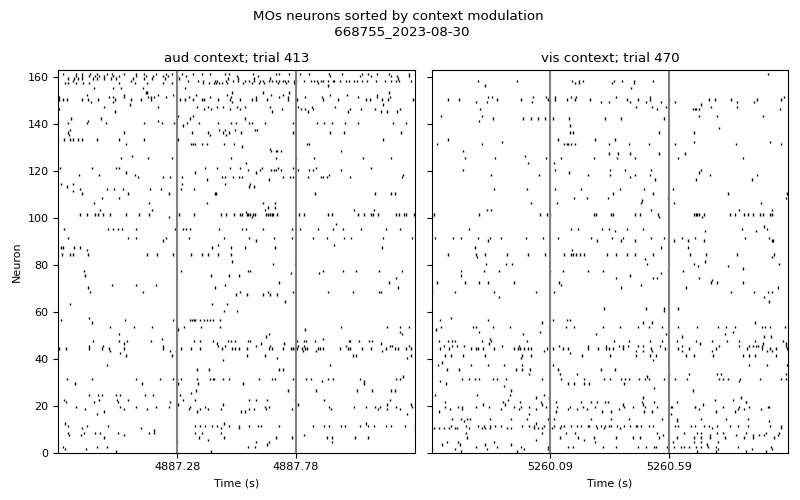

In [45]:
# select area
sel_area = 'MOs'
sel_stim = 'sound1'
sel_units = unit_modulation.query('presence_ratio>=0.99 and \
                                    isi_violations_ratio<=0.1 and \
                                    amplitude_cutoff<=0.1')

if sel_area!='all':
    sel_units = sel_units.query('structure==@sel_area')

# sort by baseline difference
sorted_units = sel_units.sort_values(by='baseline_context_modulation_zscore',ascending=False)

# select context
sel_contexts = ['aud','vis']
fig, ax = plt.subplots(1,2,figsize=(8,5),sharey=True)

for ss,sel_context in enumerate(sel_contexts):

    sel_trial=trials.query('context_name==@sel_context and stim_name==@sel_stim and is_correct==True')

    #generate random number
    rand_num = np.random.randint(0, len(sel_trial))
    sel_trial = sel_trial.iloc[rand_num]

    stim_start_time=sel_trial['stim_start_time']
    stim_stop_time=sel_trial['stim_stop_time']

    # plot sorted neuron raster, with trial number and stimulus noted
    
    for i,unit in enumerate(sorted_units['unit_id']):
        spike_times = units.query('unit_id==@unit')['spike_times'].values[0]
        spike_times = spike_times[(spike_times>=stim_start_time-0.5) & (spike_times<=stim_stop_time+0.5)]
        ax[ss].vlines(spike_times, i, i+1, color='k', lw=1.0)

    ax[ss].axvline(stim_start_time, color='grey')
    ax[ss].axvline(stim_stop_time, color='grey')

    # ax.set_xlim([0, sel_trial.duration])
    # ax.set_ylim([0, len(sorted_units)])
    if ss==0:
        ax[ss].set_ylabel('Neuron')
    ax[ss].set_xlabel('Time (s)')
    # ax[ss].set_xticks(np.unique(np.round(ax[ss].get_xticks())))
    ax[ss].set_xticks([stim_start_time,stim_stop_time])
    ax[ss].set_xticklabels([np.round(stim_start_time,decimals=2),np.round(stim_stop_time,decimals=2)])
    ax[ss].set_xlim([stim_start_time-0.5,stim_stop_time+0.5])
    ax[ss].set_ylim([0, len(sorted_units)+1])
    ax[ss].set_title(f'{sel_context} context; trial {sel_trial["trial_index"]}')

fig.suptitle(f'{sel_area} neurons sorted by context modulation \n {session_info.id}')
fig.tight_layout()



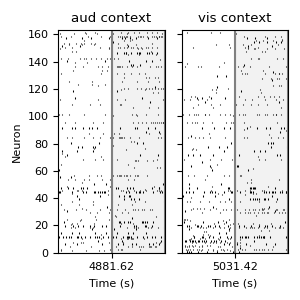

In [47]:
# select area
sel_area = 'MOs'
sel_stim = 'sound1'
sel_units = unit_modulation.query('presence_ratio>=0.99 and \
                                    isi_violations_ratio<=0.1 and \
                                    amplitude_cutoff<=0.1')

if sel_area!='all':
    sel_units = sel_units.query('structure==@sel_area')

# sort by baseline difference
sorted_units = sel_units.sort_values(by='baseline_context_modulation_zscore',ascending=False)

# select context
sel_contexts = ['aud','vis']
fig, ax = plt.subplots(1,2,figsize=(3,3),sharey=True)

for ss,sel_context in enumerate(sel_contexts):

    sel_trial=trials.query('context_name==@sel_context and stim_name==@sel_stim and is_correct==True')

    #generate random number
    rand_num = np.random.randint(0, len(sel_trial))
    sel_trial = sel_trial.iloc[rand_num]

    stim_start_time=sel_trial['stim_start_time']
    stim_stop_time=sel_trial['stim_stop_time']

    # plot sorted neuron raster, with trial number and stimulus noted
    
    for i,unit in enumerate(sorted_units['unit_id']):
        spike_times = units.query('unit_id==@unit')['spike_times'].values[0]
        spike_times = spike_times[(spike_times>=stim_start_time-0.5) & (spike_times<=stim_stop_time+0.5)]
        ax[ss].vlines(spike_times, i, i+1, color='k', lw=0.75)

    ax[ss].axvline(stim_start_time, color='grey')
    ax[ss].axvline(stim_stop_time, color='grey')

    #add patch for stimulus
    ax[ss].axvspan(stim_start_time,stim_stop_time, color='grey', alpha=0.1)

    # ax.set_xlim([0, sel_trial.duration])
    # ax.set_ylim([0, len(sorted_units)])
    if ss==0:
        ax[ss].set_ylabel('Neuron')
    ax[ss].set_xlabel('Time (s)')
    # ax[ss].set_xticks(np.unique(np.round(ax[ss].get_xticks())))
    ax[ss].set_xticks([stim_start_time])
    ax[ss].set_xticklabels([np.round(stim_start_time,decimals=2)])
    ax[ss].set_xlim([stim_start_time-0.5,stim_stop_time])
    ax[ss].set_ylim([0, len(sorted_units)+1])
    ax[ss].set_title(f'{sel_context} context')#; trial {sel_trial["trial_index"]}')

# fig.suptitle(f'{sel_area} neurons sorted by context modulation \n {session_info.id}')
fig.tight_layout()



In [49]:
#save as pdf
folder=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-11-01-plots_for_paper"
fig.savefig(os.path.join(folder,f'{session_info.id}_context_modulation_raster_'+sel_area+'.pdf'),format='pdf',bbox_inches='tight',dpi=600)

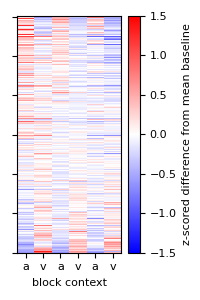

In [60]:
#plot blockwise modulation

fig,ax=plt.subplots(1,1,figsize=(2,3))
im=ax.imshow(np.vstack(sorted_units['blockwise_context_modulation_zscore'].values),
             interpolation='none',aspect='auto',cmap='bwr',vmin=-1.5,vmax=1.5)
ax.set_xlabel('block context')
if trials.iloc[0]['context_name']=='aud':
    ax.set_xticks([0,1,2,3,4,5])
    # ax.set_xticklabels(['aud','vis','aud','vis','aud','vis'])
    ax.set_xticklabels(['a','v','a','v','a','v'])
elif trials.iloc[0]['context_name']=='vis':
    # ax.set_xticklabels(['vis','aud','vis','aud','vis','aud'])
    ax.set_xticklabels(['a','v','a','v','a','v'])
    ax.set_xticks([0,1,2,3,4,5])
# ax.set_ylabel('Neuron')
ax.set_yticklabels([])

# ax.set_title(f'{sel_area} neurons sorted by context modulation \n {session_info.id}')
ax.set_title('')
ax.set_ylim(ax.get_ylim()[::-1])
#colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('z-scored difference from mean baseline')
fig.tight_layout()

In [61]:
#save as pdf
folder=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-10-04-plots_for_paper"
fig.savefig(os.path.join(folder,f'{session_info.id}_blockwise_context_modulation_.png'),format='png',bbox_inches='tight',dpi=600)

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(0.25,4))
ax.imshow(-np.vstack(sorted_units['baseline_context_modulation_zscore'].values),cmap='coolwarm',aspect='auto',interpolation='none')
ax.set_xticks([])
ax.set_yticks([])
# ax.invert_y_axis()

In [ ]:
trials.columns

In [89]:
#troubleshoot trials since last bit of information

 #add trials/time since last rewarded target to trials table
trials_since_rewarded_target=[]
time_since_rewarded_target=[]
last_rewarded_time=np.nan
last_rewarded_trial=np.nan
trials_since_last_information=[]
time_since_last_information=[]
last_informative_trial=np.nan
last_informative_time=np.nan

trials_since_last_information_no_targets=[]
time_since_last_information_no_targets=[]

non_response_flag=False

for tt,trial in trials.iterrows():
    #track trials/time since last bit of information, exclude trials after non-responses to targets
    
    if trial['is_target'] and not trial['is_response']:
        non_response_flag=True

    elif trial['is_target'] and trial['is_response']:
        last_informative_time=trial['start_time']
        last_informative_trial=tt
        non_response_flag=False

    if trial['is_rewarded'] and trial['is_target']:
        last_rewarded_time=trial['reward_time']
        last_rewarded_trial=tt

    if non_response_flag==True:
        trials_since_last_information_no_targets.append(np.nan)
        time_since_last_information_no_targets.append(np.nan)
    else:
        trials_since_last_information_no_targets.append(tt-last_informative_trial)
        time_since_last_information_no_targets.append(trial['start_time']-last_informative_time)

    trials_since_last_information.append(tt-last_informative_trial)
    time_since_last_information.append(trial['start_time']-last_informative_time)

    #trials/time since last rewarded target
    trials_since_rewarded_target.append(tt-last_rewarded_trial)
    time_since_rewarded_target.append(trial['start_time']-last_rewarded_time)

    


trials['trials_since_rewarded_target']=trials_since_rewarded_target
trials['time_since_rewarded_target']=time_since_rewarded_target

trials['trials_since_last_information']=trials_since_last_information
trials['time_since_last_information']=time_since_last_information

trials['trials_since_last_information_no_targets']=trials_since_last_information_no_targets
trials['time_since_last_information_no_targets']=time_since_last_information_no_targets

<Axes: xlabel='id'>

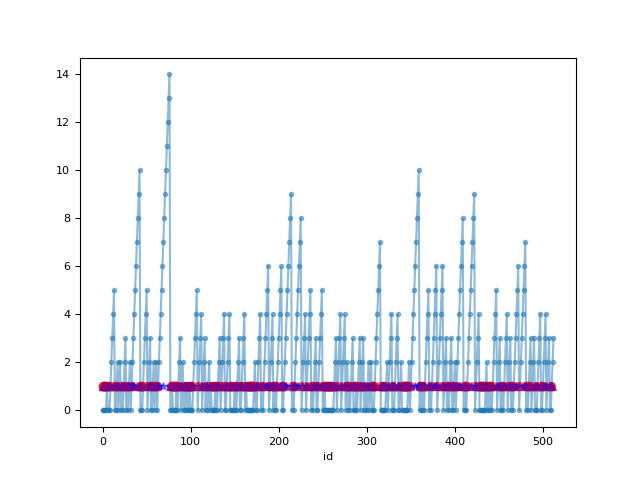

In [90]:
fig,ax=plt.subplots(1,1)

trials['trials_since_last_information'].plot(alpha=0.5,marker='.')
# trials['trials_since_rewarded_target'].plot(alpha=0.5,linestyle='--',marker='.')
# trials['trials_since_last_information_no_targets'].plot(alpha=0.5,linestyle=':',marker='.')

trials.query('is_target==True and is_rewarded==True')['is_target'].astype(int).plot(color='r',linestyle='',marker='o',alpha=0.5)
trials.query('is_target==True and is_rewarded==False')['is_target'].astype(int).plot(color='b',linestyle='',marker='*',alpha=0.5)
trials.query('is_response==True')['is_response'].astype(int).plot(color='purple',linestyle='',marker='^',alpha=0.5)

In [91]:
Y=trials['trials_since_last_information']

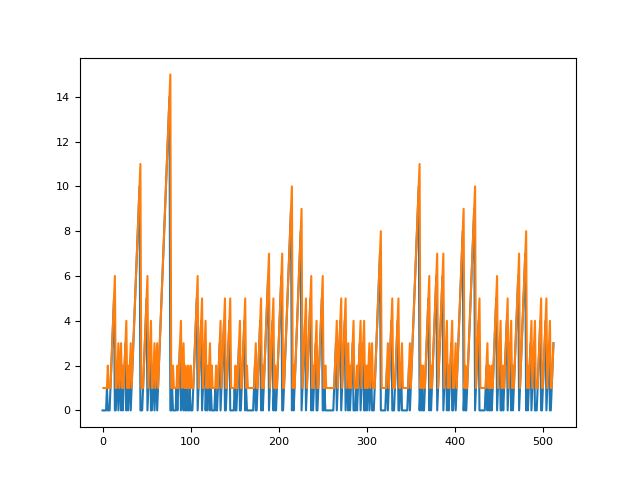

In [93]:
fig,ax=plt.subplots(1,1)
ax.plot(Y)
ax.plot(X)

In [95]:
X.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       503, 504, 505, 506, 507, 508, 509, 510, 511, 512],
      dtype='int64', name='id', length=513)

In [65]:
trials[['trials_since_rewarded_target','is_target','is_response']]

,trials_since_rewarded_target,is_target,is_response
id,,,
0,NaN,True,True
1,1.0,True,True
2,1.0,True,True
3,1.0,True,True
4,1.0,True,True
...,...,...,...
508,9.0,True,True
509,10.0,True,True
510,1.0,False,True


In [106]:
#blockwise average differences (z-score)

blockwise_context_modulation = {
    'unit_id':[],
    'session_id':[],
    'project':[],
    'blockwise_context_modulation_zscore':[],
    'blockwise_context_modulation_hz':[],
}

for uu,unit in units.iterrows():

    blockwise_context_modulation['unit_id'].append(unit['unit_id'])
    blockwise_context_modulation['session_id'].append(str(session_info.id))
    blockwise_context_modulation['project'].append(str(session_info.project))

    #find baseline frs across all trials
    baseline_frs = trial_da.sel(unit_id=unit['unit_id'],time=slice(0.1,0.3)).mean(dim='time')

    blockwise_frs_raw=[]
    blockwise_frs_zscore=[]

    for block in trials['block_index'].unique():
        block_frs = baseline_frs.sel(trials=trials.query('block_index==@block').index)

        blockwise_frs_raw.append(block_frs.mean(skipna=True).values)
        blockwise_frs_zscore.append((block_frs.mean(skipna=True).values-baseline_frs.mean(skipna=True).values)/baseline_frs.std(skipna=True))

    blockwise_context_modulation['blockwise_context_modulation_hz'].append(np.array(blockwise_frs_raw))
    blockwise_context_modulation['blockwise_context_modulation_zscore'].append(np.array(blockwise_frs_zscore))

blockwise_context_modulation_df = pd.DataFrame(blockwise_context_modulation)

In [ ]:
blockwise_context_modulation_df